Test code to convert gender into binary variable where 1 is male and 0 female

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import sklearn
import sys
import os
sys.path.insert(0, os.path.abspath("../pipeline"))
import Make_By_Officer_DF as make_officer_df
import Feat_Engineering as feat_engineering_helpers
import Run_Model as run_model
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
t1 = (2012, 2014)
t2 = (2015, 2015)
additional_cont_feat, final_df = make_officer_df.make_df(t1, t2)


In [3]:
cont_feat = ["birth_year", "start_date_timestamp", "male"]
cont_feat.extend(additional_cont_feat)
cat_feat = ["race"]

target_col = "severe_complaint"

In [4]:
best_rf = sklearn.ensemble.RandomForestClassifier(class_weight="balanced", random_state =4,
                                                         n_estimators =100, min_samples_split =7,
                                                        max_depth =5, criterion = "gini")

In [5]:
train, test = run_model.PreProcessing.tt_split(final_df[[target_col] + cont_feat+cat_feat], 30)
normalize_cont = False
train_X, train_Y, test_X, test_Y, labels = run_model.pre_processing(target_col, train, test,
                                                                    cont_feat, cat_feat, normalize_cont)
best_rf = best_rf.fit(train_X, train_Y)

In [6]:
pred_y = best_rf.predict(test_X)
sklearn.metrics.balanced_accuracy_score(test_Y, pred_y)

0.6536734693877551

Our best classifier is n_estimators 100, min samples split = 7, max depth 5, class weight balanced, criterion Gini

In [7]:
feature_headers = labels
feature_headers.remove(target_col)
feature_importances = pd.DataFrame(index=feature_headers, data=best_rf.feature_importances_).sort_values(by=0,
                                                                                                             ascending=
                                                                                                             False)

In [8]:
feature_importances = feature_importances.sort_values(by = 0, 
                                                            ascending=False).rename(columns = {0:"Gini Importance"})

In [9]:
feature_importances

,Gini Importance
Pcnt Complaints Against MALE,0.108068
Other/Unknown,0.092384
Active - Physical Force,0.089600
Passive - Other,0.084659
start_date_timestamp,0.081491
birth_year,0.072813
trr_total,0.068773
average_salary,0.061858
salary_change,0.046058
Non-Violent Civilian Contact,0.042355


In [10]:
# feature_importances.to_csv("Feature_Importances_Final.csv")

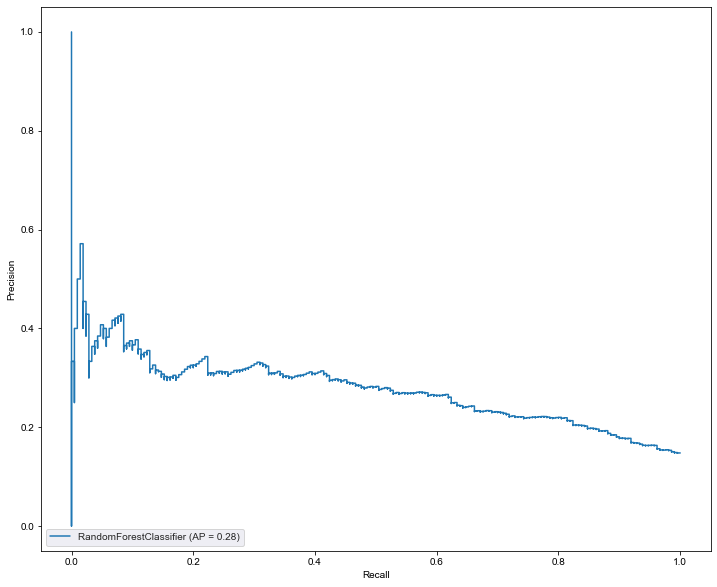

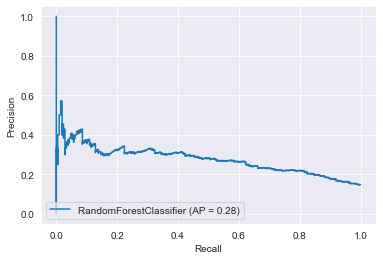

In [11]:
fig, (ax_mine) = plt.subplots(1, figsize=(12, 10))
sns.set_style("darkgrid")
sklearn.metrics.plot_precision_recall_curve(best_rf, test_X, test_Y).plot(ax=ax_mine)

{'precision': 0.2650862068965517, 'recall': 0.5857142857142857, 'f1-score': 0.3649851632047477, 'support': 210}
balanced_accuracy: 0.6536734693877551


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=4, verbose=0,
                       warm_start=False)

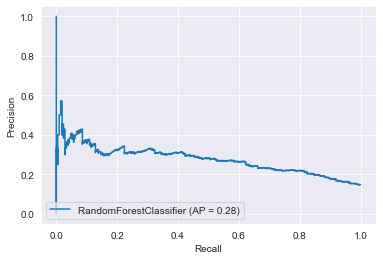

In [12]:
run_model.eval_single_model(best_rf, test_X, test_Y)

In [12]:
run_model.fixed_val_threshold(best_rf, test_X, test_Y)

'fixed val threshold metrics: '

,precision,recall,balanced_accuracy
Cutoff,,,
0.00000,0.146341,1.000000,0.500000
0.00001,0.146341,1.000000,0.500000
0.01000,0.146341,1.000000,0.500000
0.05000,0.146341,1.000000,0.500000
0.10000,0.146341,1.000000,0.500000
0.20000,0.146341,1.000000,0.500000
0.30000,0.150875,0.985714,0.517347
0.40000,0.196332,0.866667,0.629252
0.50000,0.265086,0.585714,0.653673


In [14]:
best_rf.base_estimator

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
base_tree_fit_on_train = best_rf.base_estimator
base_tree_fit_on_train.fit(train_X, train_Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(base_tree_fit_on_train, out_file='tree1.dot', 
                feature_names = feature_headers,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

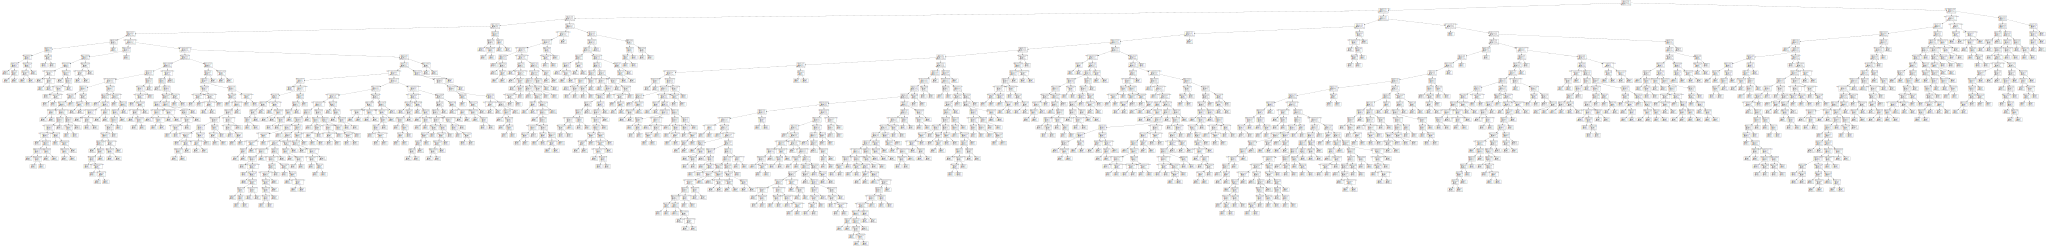

In [19]:
from graphviz import Source
# best_fit_on_train.fit(train_X_m1, train_Y_m1) #Just re-create exactly what we did in grid_search
tree_string_1 = sklearn.tree.export_graphviz(base_tree_fit_on_train)
tree_vis_1 = Source(tree_string_1)
tree_vis_1